# Multi-class Classification

## Import relevant modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## Load the dataset

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## View the dataset

In [4]:
# Output example #2917 of the training set.
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

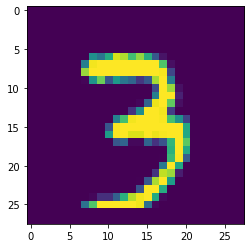

In [5]:
# Use false colors to visualize the array.
plt.imshow(x_train[2917])

## Normalize feature values

In [15]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

## Define a plotting function

In [16]:
def plot_curve(epochs, hist, list_of_metrics):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

## Create a deep neural net model

In [17]:
def create_model(my_learning_rate):
    """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
    model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a one-dimensional 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.   
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  
  # Define a dropout regularization layer. 
    model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. 
  # The units parameter is set to 10 because the model must choose among 10 possible output values 
  # (representing the digits from 0 to 9, inclusive).
  
  # Don't change this layer.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification is different than the loss function for binary classification.  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
    return model    


def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                        epochs=epochs, shuffle=True, 
                        validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist    

## Call the function

2022-08-21 00:12:02.596984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
12/12 [==============================] - 1s 62ms/step - loss: 1.7774 - accuracy: 0.4439 - val_loss: 1.0239 - val_accuracy: 0.7798
Epoch 2/50
12/12 [==============================] - 0s 23ms/step - loss: 0.9345 - accuracy: 0.7245 - val_loss: 0.5606 - val_accuracy: 0.8596
Epoch 3/50
12/12 [==============================] - 0s 22ms/step - loss: 0.6548 - accuracy: 0.8041 - val_loss: 0.4264 - val_accuracy: 0.8854
Epoch 4/50
12/12 [==============================] - 0s 22ms/step - loss: 0.5358 - accuracy: 0.8421 - val_loss: 0.3638 - val_accuracy: 0.9009
Epoch 5/50
12/12 [==============================] - 0s 23ms/step - loss: 0.4717 - accuracy: 0.8599 - val_loss: 0.3253 - val_accuracy: 0.9112
Epoch 6/50
12/12 [==============================] - 0s 21ms/step - loss: 0.4268 - accuracy: 0.8747 - val_loss: 0.2992 - val_accuracy: 0.9173
Epoch 7/50
12/12 [==============================] - 0s 22ms/step - loss: 0.3958 - accuracy: 0.8835 - val_loss: 0.2805 - val_accuracy: 0.9224
Epoch 8/50
12

[0.1310364454984665, 0.9605000019073486]

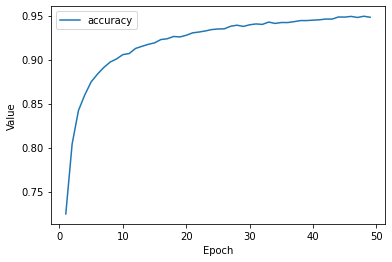

In [18]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)